In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Hackerearth\Plane Crash\train.csv')
df_test=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Hackerearth\Plane Crash\test.csv')
sample=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Hackerearth\Plane Crash\sample_submission.csv')

In [3]:
le = LabelEncoder()
df_train['Severity']= le.fit_transform(df_train["Severity"])
#df_train.drop(['Severity'],axis=1,inplace=True)

In [4]:
df_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
df_train.corr()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Severity,1.000000,0.205276,0.001858,0.010642,-0.000930,0.035977,-0.008819,0.212203,0.005572,0.026349,-0.153946,-0.008583
Safety_Score,0.205276,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,0.001858,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.010642,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,-0.000930,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.035977,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,-0.008819,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.212203,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.005572,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.026349,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047


In [6]:
df_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [7]:
df_train.describe(include='all')

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.410400,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,1.182249,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,0.000000,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,1.000000,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,3.000000,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,3.000000,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


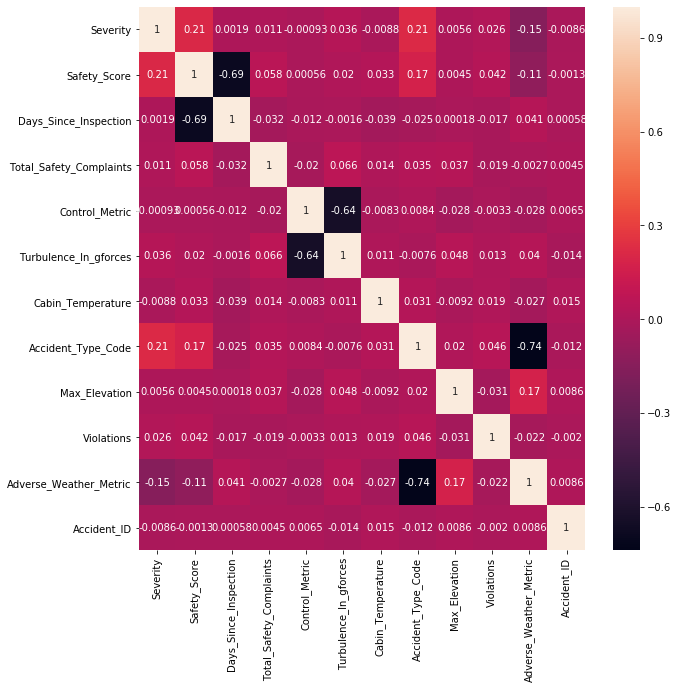

In [10]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df_train.corr(), annot=True)

<h6>Outlier Detection and Removal to be done</h6>
<h6>Column with high correlation to be removed</h6>

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


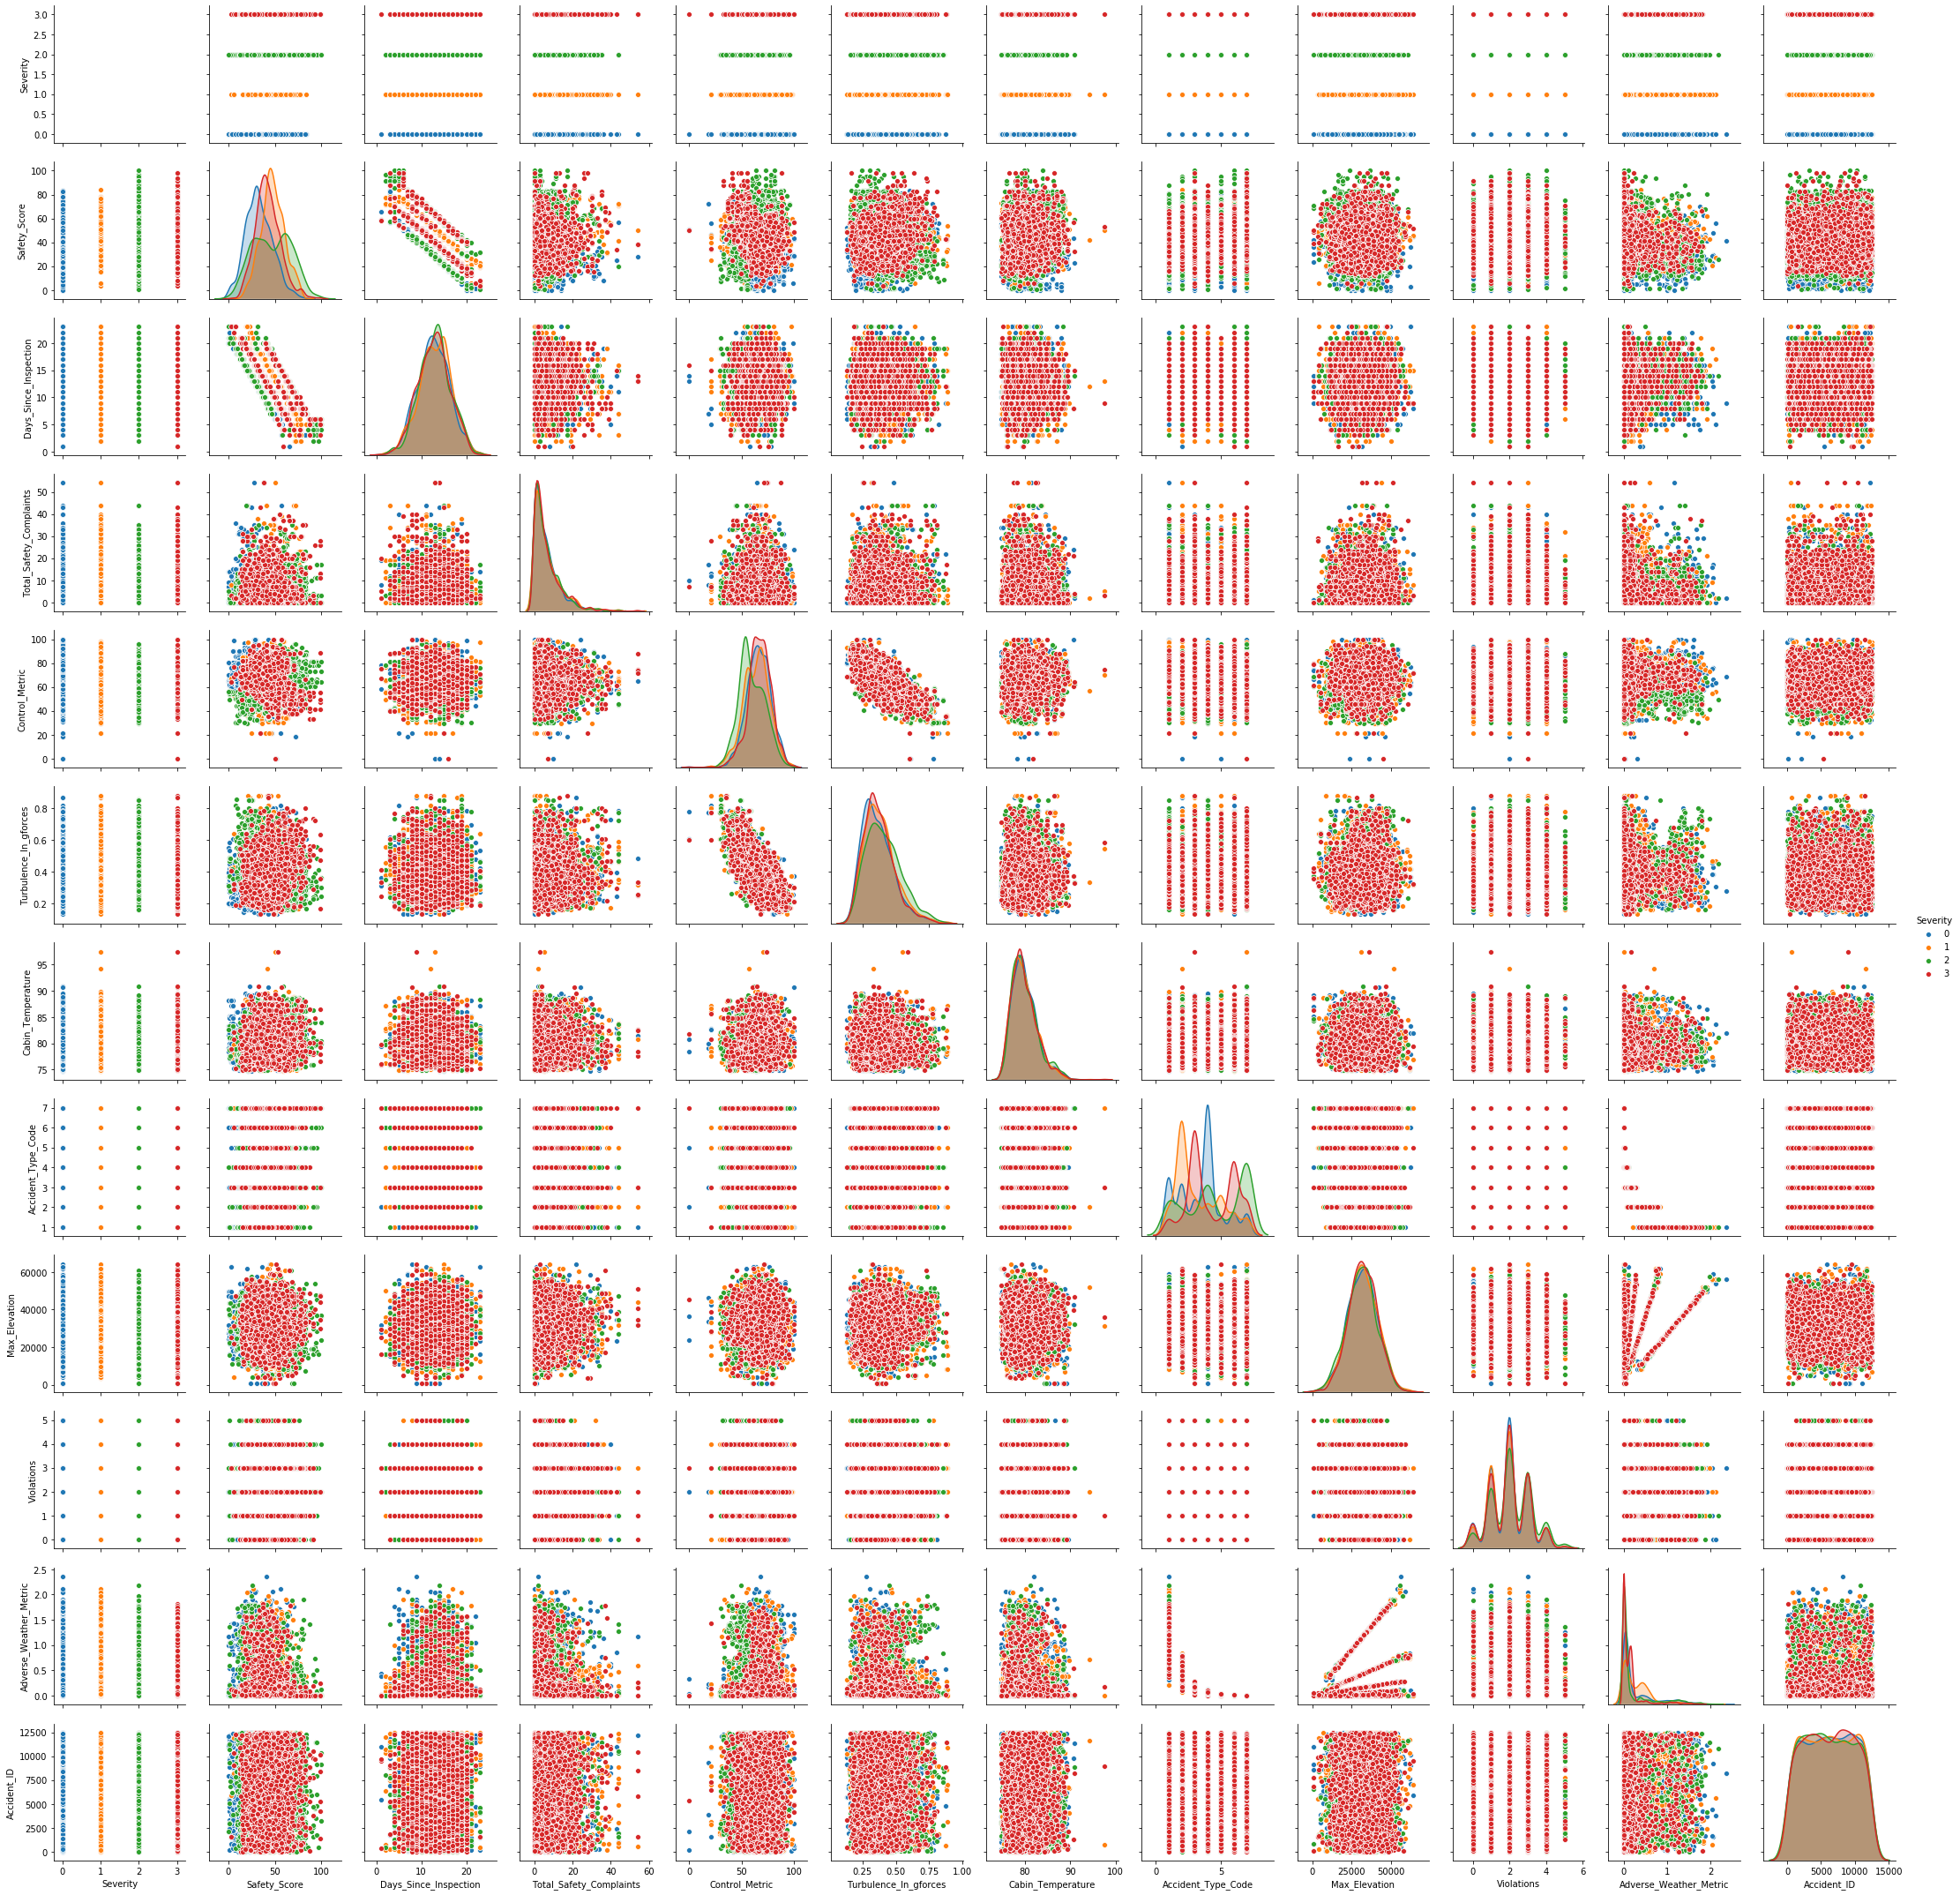

In [121]:
sns.pairplot(df_train,hue='Severity')

In [11]:
X=df_train.iloc[:,1:]
y= df_train.iloc[:,:1]

In [19]:
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [18]:
X=X.drop(['Accident_ID'],axis=1)

In [13]:
y.head()

,Severity
0,1
1,1
2,2
3,3
4,2


In [20]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.45530256,  0.30198105,  2.2140724 , ..., -0.07064887,
         0.94987305,  0.44270091],
       [ 1.2758883 , -0.82808182,  2.93126449, ..., -0.6337356 ,
        -0.01173158,  0.25377304],
       [ 1.31267317,  0.01946533,  1.35344189, ...,  0.77052775,
         0.94987305, -0.66193896],
       ...,
       [-0.86895304,  1.1495282 , -0.79813439, ...,  0.18768898,
         0.94987305, -0.22949275],
       [ 0.88823228, -1.39311325, -0.94157281, ...,  0.82898759,
        -0.01173158, -0.60154411],
       [ 0.50340586,  0.01946533, -0.51125756, ..., -0.63579126,
        -0.01173158, -0.62606475]])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
model1 = RandomForestClassifier(n_estimators=100,random_state=None,max_features = 'sqrt',n_jobs=-1, verbose = 1)
model1.fit(x_train,y_train)
y_predect1 = model1.predict(x_test)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [24]:
print(classification_report(y_test,y_predect1))
print(accuracy_score(y_test, y_predect1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       912
           1       0.91      0.95      0.93       771
           2       0.94      0.92      0.93       515
           3       0.95      0.93      0.94       802

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000

0.9326666666666666


In [25]:
from xgboost import XGBClassifier

In [27]:
model3 = XGBClassifier()
model3.fit(x_train, y_train)
y_predict3 = model3.predict(x_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
# print(confusion_matrix(y_test,y_predict3))
print(classification_report(y_test,y_predict3))
print(accuracy_score(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       912
           1       0.96      0.97      0.96       771
           2       0.96      0.96      0.96       515
           3       0.96      0.95      0.96       802

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

0.959
